In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


####A subject's dataset
* volume data -> MRI acquisition -> Registration -> Coordinates transform to MNI space 
 |
  \-- voxel-based gray matter parcellation (obtain parcellation mask) -> AAL/anatomical template
 
* surfaces data (cortical, skull, skin surfaces extraction) -> FSL/BET 

* connectivity data (white matter weights, tract-lengths)   -> Diffusion Toolkit + TrackVis

* region mapping between parcellation and number of vertices in the cortical surface.

+ lead-field matrices (ie, projection matrices) mapping nodes onto EEG/MEG space

In [2]:
from tvb.datatypes.cortex import Cortex

from tvb.simulator.lab import *

In [3]:
# From the inside out
connectome       = connectivity.Connectivity(load_default=True)
cortical_surface = Cortex.from_file()
brain_skull      = surfaces.BrainSkull(load_default=True)
skull_skin       = surfaces.SkullSkin(load_default=True)
skin_air		 = surfaces.SkinAir(load_default=True)

In [4]:
# Get info
centres = connectome.centres

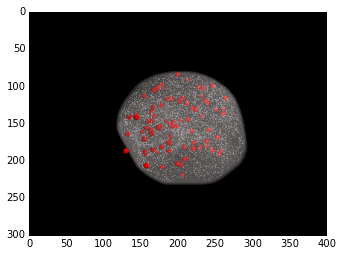

In [5]:
try:
    from tvb.simulator.plot.tools import mlab
    fig_tvb = mlab.figure(figure='John Doe', bgcolor=(0.0, 0.0, 0.0))
    
    region_centres = mlab.points3d(centres[:, 0], 
                                   centres[:, 1], 
                                   centres[:, 2],
                                   color=(1.0, 0.0, 0.0),
                                   scale_factor = 7.,
                                   figure = fig_tvb)
    
    
    plot_surface(cortical_surface, fig=fig_tvb, op=0.9, rep='fancymesh')
    plot_surface(brain_skull, fig=fig_tvb, op=0.2)
    plot_surface(skull_skin, fig=fig_tvb, op=0.15)
    plot_surface(skin_air, fig=fig_tvb, op=0.1)
    
    # Plot them
    mlab.show(stop=True)
    imshow(mlab.screenshot())
except ImportError:

    LOG.exception("Could not display!")
    pass